In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.layers import Flatten, Dense, Dropout
from keras.models import Model


from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D

from keras.optimizers import Adam


drive.mount('/content/drive')


Mounted at /content/drive


In [27]:
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


# Load pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

# Data augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/TP3_ML/cats_and_dogs/train',
    target_size=(300, 300),
    batch_size=16,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/TP3_ML/cats_and_dogs/test',
    target_size=(300, 300),
    batch_size=16,
    class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
35/35 [==============================] - 80s 2s/step - loss: 0.4494 - accuracy: 0.8671 - val_loss: 0.2922 - val_accuracy: 0.9286
Epoch 2/10
35/35 [==============================] - 80s 2s/step - loss: 0.1939 - accuracy: 0.9605 - val_loss: 0.1849 - val_accuracy: 0.9571
Epoch 3/10
35/35 [==============================] - 80s 2s/step - loss: 0.1276 - accuracy: 0.9785 - val_loss: 0.1522 - val_accuracy: 0.9286
Epoch 4/10
35/35 [==============================] - 80s 2s/step - loss: 0.0904 - accuracy: 0.9838 - val_loss: 0.1268 - val_accuracy: 0.9714
Epoch 5/10
35/35 [==============================] - 80s 2s/step - loss: 0.0721 - accuracy: 0.9892 - val_loss: 0.1140 - val_accuracy: 0.9714
Epoch 6/10
35/35 [==============================] - 81s 2s/step - loss: 0.0663 - accuracy: 0.9874 - val_loss: 0.0920 - val_accuracy: 0.9786
Epoch 7/10
35/35 [==============================] - 80s 2s/step - loss: 0.0554 - accuracy: 0.9892 - val_loss: 0.0887 - val_accuracy: 0.9786
Epoch 8/10
35/35 [==

Found 181 images belonging to 2 classes.
12/12 [==============================] - 17s 1s/step - loss: 0.0302 - accuracy: 0.9945
validation loss: 0.03016352467238903
validation accuracy: 0.9944751262664795


<ipython-input-28-99de83491293>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)


12/12 [==============================] - 18s 1s/step
              precision    recall  f1-score   support

         cat       0.71      0.70      0.71       125
         dog       0.35      0.36      0.35        56

    accuracy                           0.60       181
   macro avg       0.53      0.53      0.53       181
weighted avg       0.60      0.60      0.60       181



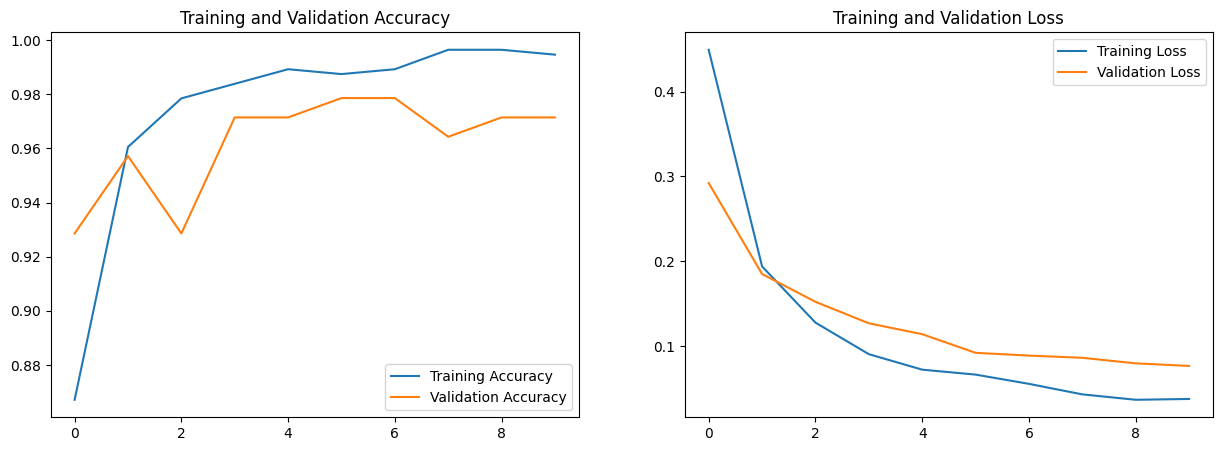

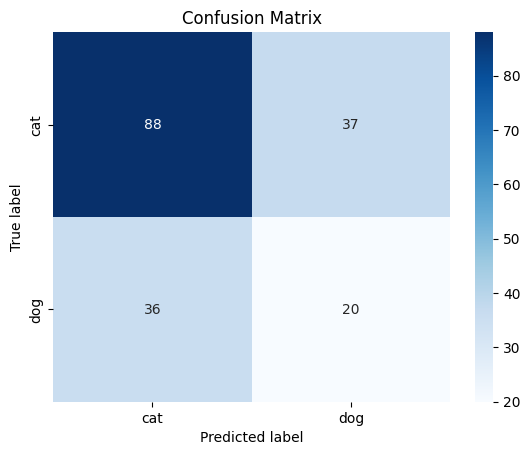

In [28]:
# Evaluate the model on the test set

validation_data_dir = '/content/drive/MyDrive/TP3_ML/cats_and_dogs/validation'
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary')
        
loss, accuracy = model.evaluate(validation_generator)
print('validation loss:', loss)
print('validation accuracy:', accuracy)

# Get the predictions for the test set
validation_generator.reset()
preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)
y_true = validation_generator.classes
y_pred = np.round(preds)

print(classification_report(y_true, y_pred, target_names=['cat', 'dog']))

# Plot the accuracy and loss over epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create labels for the classes
class_names = ['cat', 'dog']

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# set title
plt.title('Confusion Matrix')

# show the plot
plt.show()



12/12 [==============================] - 17s 1s/step


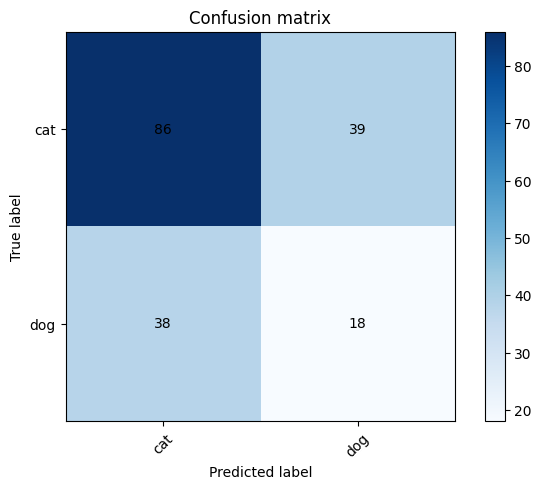

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate predictions on the validation set
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).astype(int)
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['cat', 'dog'], rotation=45)
plt.yticks(tick_marks, ['cat', 'dog'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')
plt.show()


In [26]:
from keras.applications.nasnet import NASNetMobile, preprocess_input
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Load pre-trained NASNetMobile
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Define the data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/TP3_ML/cats_and_dogs/train', target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/TP3_ML/cats_and_dogs/test', target_size=(224, 224), batch_size=32, class_mode='binary')

# Train the model
history_nasnet = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator))


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
18/18 [==============================] - 103s 5s/step - loss: 0.3326 - accuracy: 0.8995 - val_loss: 0.0426 - val_accuracy: 0.9857
Epoch 2/10
18/18 [==============================] - 77s 4s/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.1874 - val_accuracy: 0.9429
Epoch 3/10
18/18 [==============================] - 79s 4s/step - loss: 0.0134 - accuracy: 0.9928 - val_loss: 0.1620 - val_accuracy: 0.9643
Epoch 4/10
18/18 [==============================] - 77s 4s/step - loss: 0.0157 - accuracy: 0.9964 - val_loss: 0.1134 - val_accuracy: 0.9643
Epoch 5/10
18/18 [==============================] - 73s 4s/step - loss: 0.0061 - accuracy: 0.9964 - val_loss: 0.1182 - val_accuracy: 0.9643
Epoch 6/10
18/18 [==============================] - 79s 4s/step - loss: 0.0070 - accuracy: 0.9964 - val_loss: 0.1607 - val_accuracy: 0.9571
Epoch 7/10
18/18 [==============================] - 79s 4s/step - loss: 5.7598e-04 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9786
Epoch 8/10
18/1

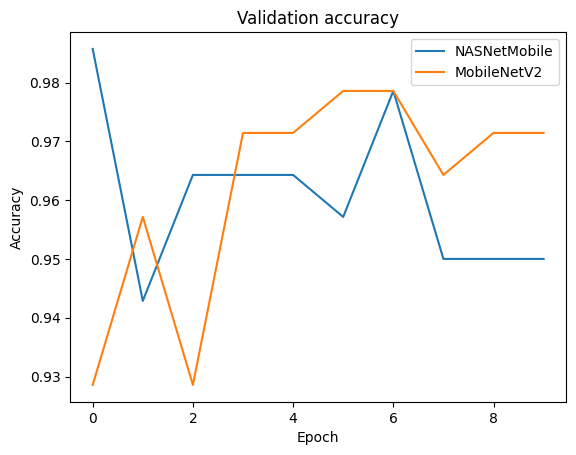

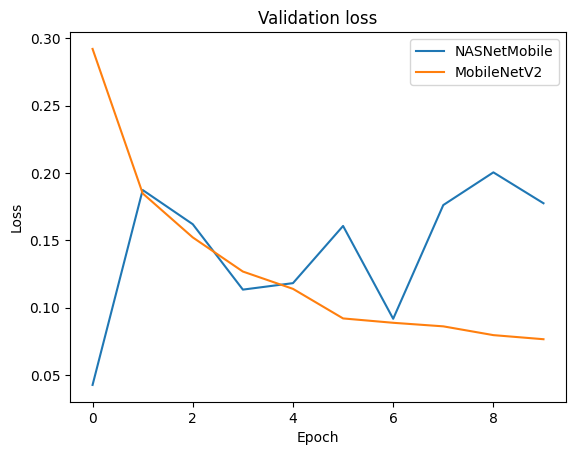

In [30]:
# Compare the performance of the two models
import matplotlib.pyplot as plt

plt.plot(history_nasnet.history['val_accuracy'], label='NASNetMobile')
plt.plot(history.history['val_accuracy'], label='MobileNetV2')
plt.title('Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_nasnet.history['val_loss'], label='NASNetMobile')
plt.plot(history.history['val_loss'], label='MobileNetV2')
plt.title('Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
